In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange,tqdm

def decode_bump_location(spike_trains, positions):
    weighted_cos = np.sum(np.cos(positions) * spike_trains, axis=0)
    weighted_sin = np.sum(np.sin(positions) * spike_trains, axis=0)
    theta_bump = np.arctan2(weighted_sin, weighted_cos)
    return theta_bump

# Network parameters
N = 300  # number of neurons
J = 3  # interaction strength in picoCoulomb (pC)
theta = np.deg2rad(10)  # offset angle in radians
tau = 10  # time constant in ms
dt = 0.1  # time step in ms
T = 1000  # total simulation time in ms
time_steps = int(T / dt)
positions_L = np.linspace(0, 2*np.pi, N, endpoint=False)  # positions of neurons in left population
positions_R = np.linspace(0, 2*np.pi, N, endpoint=False)  # positions of neurons in right population

np.random.seed(0)  # for reproducibility
potentials_L = np.random.uniform(0, 1, N)
potentials_R = np.random.uniform(0, 1, N)

spike_trains_L = np.zeros((N, time_steps))
spike_trains_R = np.zeros((N, time_steps))

# Simulation
for t in trange(1, time_steps):
    mcos_L = np.sum(np.cos(positions_L) * spike_trains_L[:, t-1]) / N
    msin_L = np.sum(np.sin(positions_L) * spike_trains_L[:, t-1]) / N
    mcos_R = np.sum(np.cos(positions_R) * spike_trains_R[:, t-1]) / N
    msin_R = np.sum(np.sin(positions_R) * spike_trains_R[:, t-1]) / N
    
    for i in range(N):
        input_current_L = J * (np.cos(positions_L[i] + theta) * mcos_L + np.sin(positions_L[i] + theta) * msin_L)
        input_current_R = J * (np.cos(positions_R[i] - theta) * mcos_R + np.sin(positions_R[i] - theta) * msin_R)
        potentials_L[i] += dt/tau * (-potentials_L[i] + input_current_L)
        potentials_R[i] += dt/tau * (-potentials_R[i] + input_current_R)
        
        firing_rate_L = 1 / (1 + np.exp(-2 * (potentials_L[i] - 0.5)))
        firing_rate_R = 1 / (1 + np.exp(-2 * (potentials_R[i] - 0.5)))
        spike_prob_L = firing_rate_L * dt
        spike_prob_R = firing_rate_R * dt
        if np.random.rand() < spike_prob_L:
            spike_trains_L[i, t] = 1/dt
        if np.random.rand() < spike_prob_R:
            spike_trains_R[i, t] = 1/dt

  0%|          | 0/9999 [00:00<?, ?it/s]

ValueError: x and y must have same first dimension, but have shapes (10000,) and (300,)

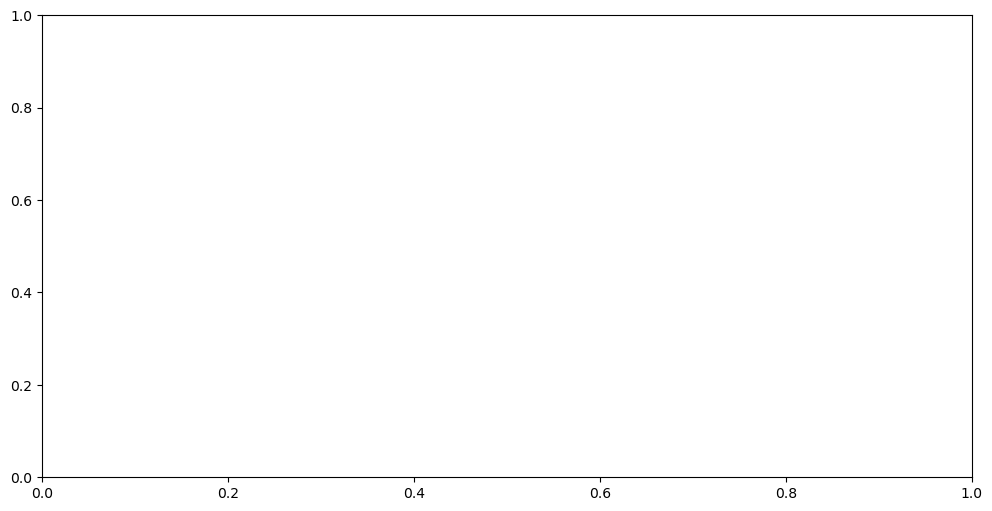

In [10]:

theta_bump_L = decode_bump_location(spike_trains_L.T, positions_L)
theta_bump_R = decode_bump_location(spike_trains_R.T, positions_R)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, T, dt), np.rad2deg(theta_bump_L), label='Left Bump Location')
plt.plot(np.arange(0, T, dt), np.rad2deg(theta_bump_R), label='Right Bump Location')
plt.xlabel('Time (ms)')
plt.ylabel('Bump Location (degrees)')
plt.title('Bump Locations Over Time')
plt.legend()
plt.show()